<a href="https://colab.research.google.com/github/jjpulidos/Intelligent-Systems-UNAL-2019-1/blob/master/isi_proj_report_ocpulidop_jjpulidos_baguevaram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto final Introducción a los Sistemas Inteligentes
* Brayan Andrés Guevara Márquez
* Oscar Camilo Pulido Peña
* Juan Jesús Pulido Sánchez

10 de Febrero de 2020

#Data Exploration

# Modelos de predicción

In [0]:
!wget "https://www.crcv.ucf.edu/data/Selfie/Selfie-dataset.tar.gz"
!tar -xf Selfie-dataset.tar.gz
!cd Selfie-dataset

--2020-02-07 22:55:16--  https://www.crcv.ucf.edu/data/Selfie/Selfie-dataset.tar.gz
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1104834653 (1.0G) [application/x-gzip]
Saving to: ‘Selfie-dataset.tar.gz’

Selfie-dataset.tar. 100%[===================>]   1.03G  73.2MB/s    in 14s     

2020-02-07 22:55:30 (72.7 MB/s) - ‘Selfie-dataset.tar.gz’ saved [1104834653/1104834653]



In [0]:
import os, os.path

print("Elementos en el Dataset: ", len(os.listdir('./Selfie-dataset/images')))

Elementos en el Dataset:  46836


In [0]:
import pandas as pd

In [0]:
columns_name = ["Id", "popularity_score", "partial_faces", "is_female", "baby", "child", "teenager",
                "youth", "middle_age", "senior", "white", "black", "asian",
                "oval_face", "round_face", "heart_face", "smiling", "mouth_open",
                "frowning", "wearing_glasses", "wearing_sunglasses", "wearing_lipstick",
                "tongue_out", "duck_face", "black_hair", "blond_hair", "brown_hair",
                "red_hair", "curly_hair", "straight_hair", "braid_hair", "showing_cellphone",
                "using_earphone", "using_mirror", "braces", "wearing_hat", "harsh_lighting",
                "dim_lighting"]

df = pd.read_csv("Selfie-dataset/selfie_dataset.txt", sep=' ', names=columns_name)

In [0]:
df

Id  ...  dim_lighting
0      00a454da495e11e28a7322000a1fa414_6  ...            -1
1      00cddb96ac4c11e3a30212279ba1b65f_6  ...            -1
2      01cdd7aa1a1a11e2aaa822000a1fb0dd_6  ...            -1
3      024696bead0c11e389d50ec42b3b1b1c_6  ...            -1
4      026df048221a11e2b52122000a1fa4b5_6  ...            -1
...                                   ...  ...           ...
46831  fe5ce3cca89311e3873c0e9928917b41_6  ...            -1
46832  feb38bc4a20711e3bc5f0e4e836c9c84_6  ...            -1
46833  fed5374e66d211e3ad1e12ed570e9379_6  ...            -1
46834  ff639554890411e2942122000aaa0535_6  ...            -1
46835  ffb33a90b06911e3b2a4120e4e51d427_6  ...            -1

[46836 rows x 38 columns]

## Useful Methods

In [0]:
def convert_real_route(image_name):
  return "./Selfie-dataset/images/" + image_name + ".jpg"

## Test: Showing a Random Selfie

(306, 306, 3)


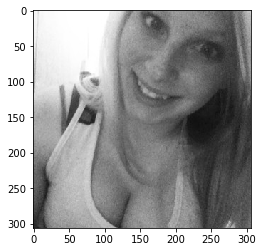

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

num = np.random.randint(0, len(df))
path = convert_real_route(df["image_name"].iloc[num])
img = cv2.imread(path)

plt.imshow(img)
plt.show()

## Getting Resolution Distribution

In [0]:
def shape_distribution(df):
  from collections import Counter
  counter = Counter()
  for index, row in df.iterrows():
    path = convert_real_route(row["image_name"])
    img = cv2.imread(path)
    counter.update({img.shape:1})
  return counter

shape_distribution(df)

Counter({(306, 306, 3): 46836})

We can conclude that all the images have the same shape.

## Getting Columns Distribution

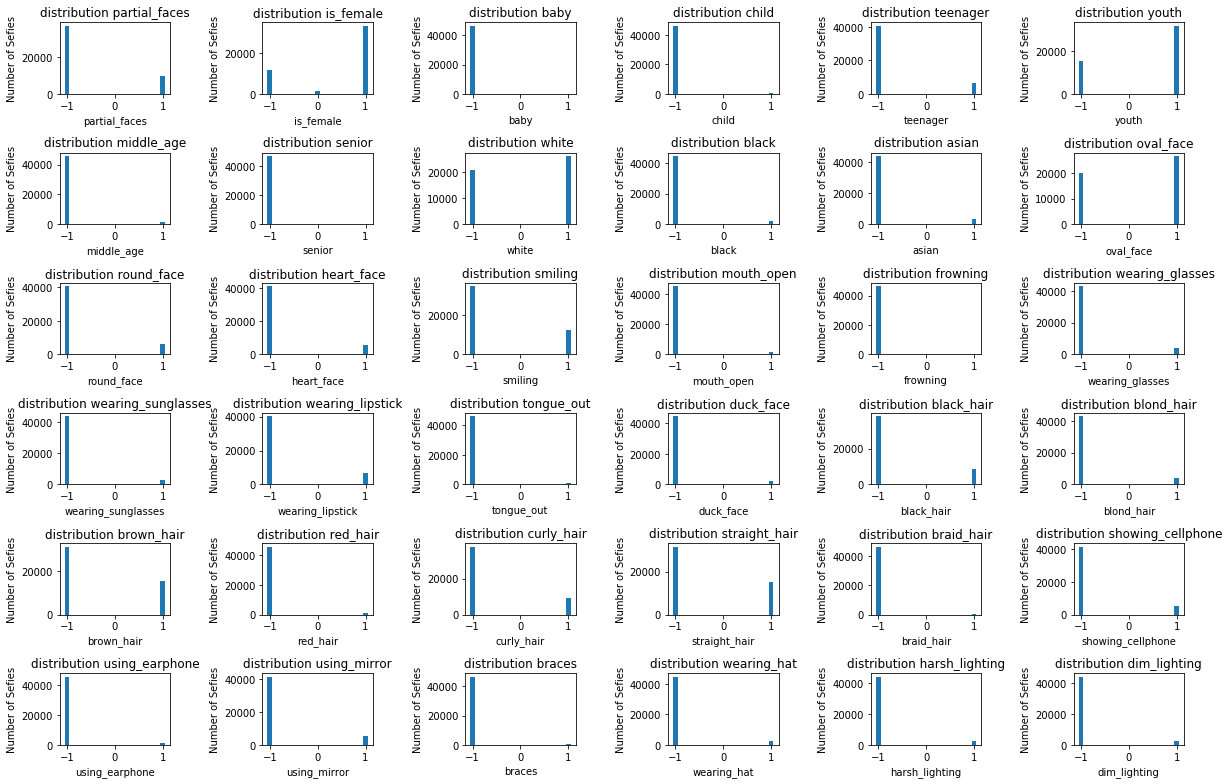

{'asian': {-1: 43705, 1: 3131},
 'baby': {-1: 46640, 1: 196},
 'black': {-1: 44515, 1: 2321},
 'black_hair': {-1: 38041, 1: 8795},
 'blond_hair': {-1: 42803, 1: 4033},
 'braces': {-1: 46350, 1: 486},
 'braid_hair': {-1: 46398, 1: 438},
 'brown_hair': {-1: 31401, 1: 15435},
 'child': {-1: 46040, 1: 796},
 'curly_hair': {-1: 37690, 1: 9146},
 'dim_lighting': {-1: 44253, 1: 2583},
 'duck_face': {-1: 44254, 1: 2582},
 'frowning': {-1: 46388, 1: 448},
 'harsh_lighting': {-1: 44253, 1: 2583},
 'heart_face': {-1: 41387, 1: 5449},
 'is_female': {-1: 11572, 0: 1609, 1: 33655},
 'middle_age': {-1: 45717, 1: 1119},
 'mouth_open': {-1: 45017, 1: 1819},
 'oval_face': {-1: 20078, 1: 26758},
 'partial_faces': {-1: 36944, 1: 9892},
 'red_hair': {-1: 45822, 1: 1014},
 'round_face': {-1: 40604, 1: 6232},
 'senior': {-1: 46820, 1: 16},
 'showing_cellphone': {-1: 41381, 1: 5455},
 'smiling': {-1: 34629, 1: 12207},
 'straight_hair': {-1: 31620, 1: 15216},
 'teenager': {-1: 40561, 1: 6275},
 'tongue_out': {

In [0]:
def all_columns_distribution(df):
  
  dict_dist = {}
  fig = plt.figure(figsize=(17,11))
  num= 0

  for i in range(6):
    for j in range(6):
      ax = plt.subplot2grid((6,6), (i,j))
      data = df[df.columns[num]].value_counts()
      points = data.index 
      frequency = data.values
      ax.bar(points, frequency, width=0.1) 
      plt.title("distribution " + df.columns[num])
      plt.xlabel(df.columns[num])
      plt.ylabel("Number of Sefies")
      
      # print(points, frequency)
      dict_dist[df.columns[num]] = {}
      for point, freq in zip(points, frequency):
        dict_dist[df.columns[num]][point] = freq
      num +=1
  fig.tight_layout()
  plt.show()

  return dict_dist

# Slicing df to get 6x6 matrix of columns
dict_dist = all_columns_distribution(df.loc[:, "partial_faces":])
dict_dist

## Descriptive Metrics

- Count (also in dict_dist)
- Mean
- Dev Std
- Min and Max (useless in the case of binary data, but usefull for the popularity score)
- Percentile

In this step we have a lot of data to use:

36 Features with binary data (-1 and 1) that means 72 row for descriptions (in the case of if_female we have -1, 0 and 1) in total 73 row and 288 columns for the metrics calculated using 1 feature vs 1 feature, total 73x288 Matrix but we can ommit a lot of them because is a simetric Matrix (was ommit popularity_score because is not binary value, that means that the time to compute the metrics increase a lot, having 3387 different values)


## Correlation between population_score and other features

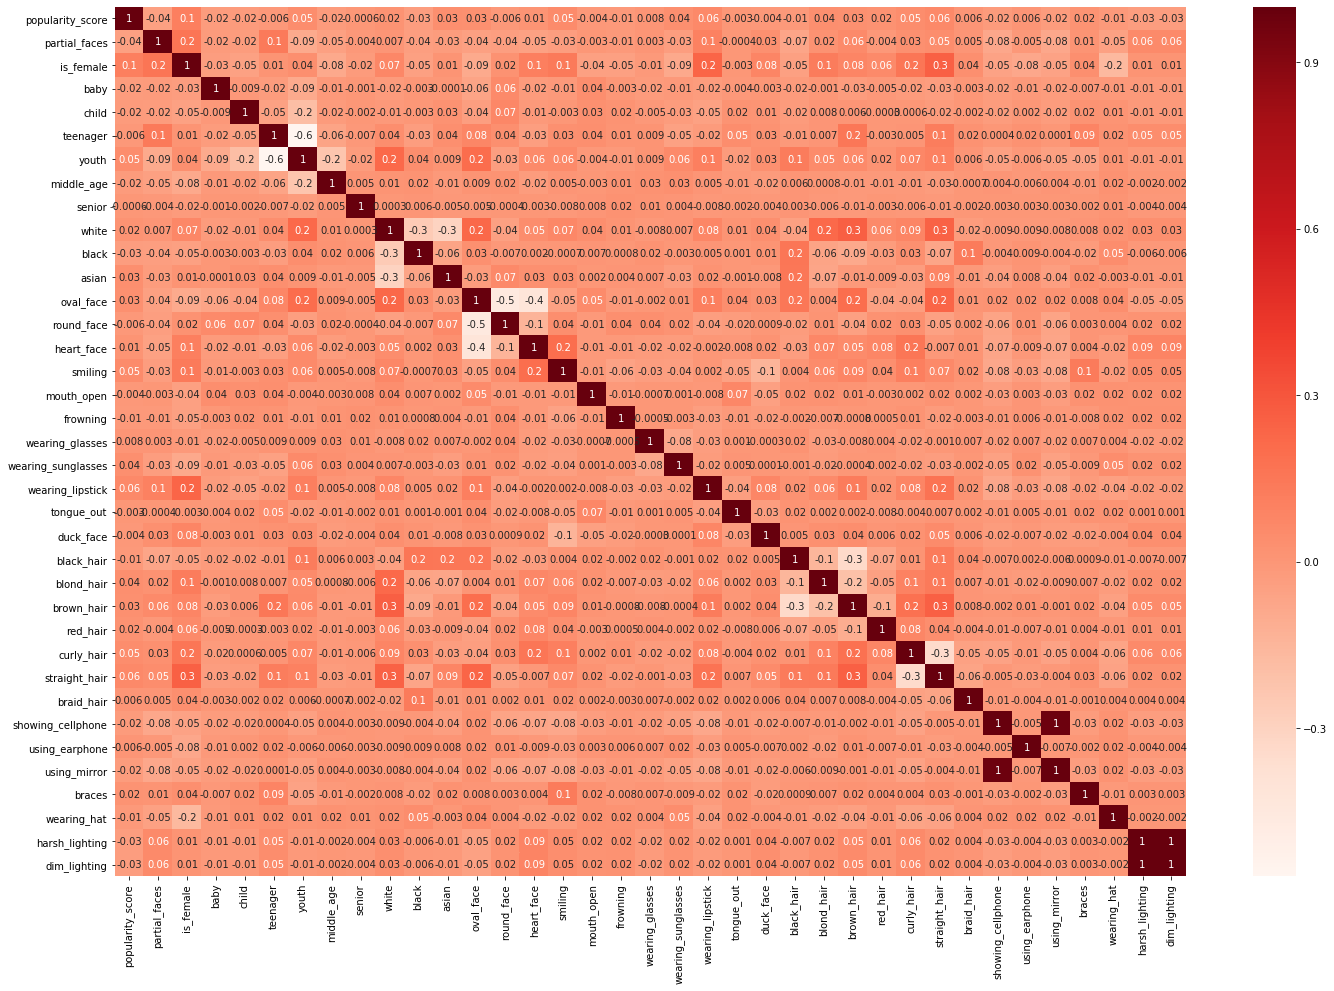

In [0]:
import seaborn as sns
data = df.loc[:, "popularity_score":]
plt.figure(figsize=(24,16))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.1g')
plt.show()

In [0]:
df.groupby(["youth"]).describe()


popularity_score                             ... dim_lighting               
                 count      mean       std    min  ...          25%  50%  75%  max
youth                                              ...                            
-1             15192.0  4.331980  0.591082  1.656  ...         -1.0 -1.0 -1.0  1.0
 1             31644.0  4.393973  0.591318  1.985  ...         -1.0 -1.0 -1.0  1.0

[2 rows x 288 columns]

In [0]:
#Correlation with output variable
cor_target = abs(cor["popularity_score"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

popularity_score    1.0
Name: popularity_score, dtype: float64

In [0]:
relevant_features = cor_target[cor_target>0.05]
relevant_features

pandas.core.series.Series

the major of the correlations occur between popularity_score and is_female, but the correlation score was really close to zero, more than one, due to the correlational analysis, can we say that populariity_score doesnt depend of any of these features

In [0]:
for col in data.columns:
  cor_target = abs(cor[col])#Selecting highly correlated features
  relevant_features = cor_target[cor_target>0.5]
  print(relevant_features.head(), "\n")
  # print(col, relevant_features)

popularity_score    1.0
Name: popularity_score, dtype: float64 

partial_faces    1.0
Name: partial_faces, dtype: float64 

is_female    1.0
Name: is_female, dtype: float64 

baby    1.0
Name: baby, dtype: float64 

child    1.0
Name: child, dtype: float64 

teenager    1.000000
youth       0.566458
Name: teenager, dtype: float64 

teenager    0.566458
youth       1.000000
Name: youth, dtype: float64 

middle_age    1.0
Name: middle_age, dtype: float64 

senior    1.0
Name: senior, dtype: float64 

white    1.0
Name: white, dtype: float64 

black    1.0
Name: black, dtype: float64 

asian    1.0
Name: asian, dtype: float64 

oval_face    1.0
Name: oval_face, dtype: float64 

round_face    1.0
Name: round_face, dtype: float64 

heart_face    1.0
Name: heart_face, dtype: float64 

smiling    1.0
Name: smiling, dtype: float64 

mouth_open    1.0
Name: mouth_open, dtype: float64 

frowning    1.0
Name: frowning, dtype: float64 

wearing_glasses    1.0
Name: wearing_glasses, dtype: float64 

With these results, was found that between teenager and youth exist a correlation more than 0.5, and this make sense because teenager can be considered like youth people for the most of the people.

teenager - youth corr: 0.566458   

The Highest Correlation was evidenced between using_mirror and showing_cellphone, also these make sense, based on "Selfies".

showing_cellphone - using_mirror corr: 0.980025 


Toca revisar
harsh_lighting - dim_lighting corr: 1.0

## Elbow method

In [0]:
distortions = []
K = range(1, 15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df.loc[:, "partial_faces":])
    distortions.append(kmeanModel.inertia_)

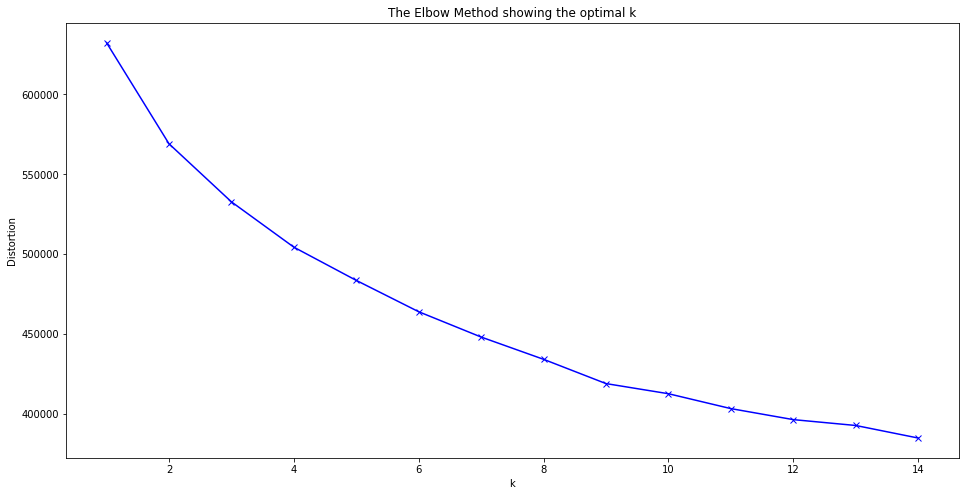

In [0]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Silhouette Analysis

In [0]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
# 23 es el que mejor ha dado con 0.12249689613264163

range_n_clusters = range(3000, 3001)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df.loc[:, "partial_faces":]) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df.loc[:, "partial_faces":])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df.loc[:, "partial_faces":], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df.loc[:, "partial_faces":], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # # 2nd Plot showing the actual clusters formed
    # colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
    #             c=colors, edgecolor='k')

    # # Labeling the clusters
    # centers = clusterer.cluster_centers_
    # # Draw white circles at cluster centers
    # ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
    #             c="white", alpha=1, s=200, edgecolor='k')

    # for i, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
    #                 s=50, edgecolor='k')

    # ax2.set_title("The visualization of the clustered data.")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")

    # plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
    #               "with n_clusters = %d" % n_clusters),
    #              fontsize=14, fontweight='bold')

plt.show()

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=10, random_state=0).fit(df.loc[:, "partial_faces":])
centroids, labels = kmeans.cluster_centers_, kmeans.labels_


df_pca = df.loc[:, "partial_faces":]
T = df_pca
pca_model = PCA(n_components=2)
pca_model.fit(T)
T = pca_model.transform(T)
centroid_pca = pca_model.transform(centroids)
# colors = ['blue', 'red', 'green', 'orange', 'black', 'brown']
# features_colors = [ colors[labels[i]] for i in range(len(T)) ]
# plt.figure(figsize=(20,10))
# plt.scatter(T[:, 0], T[:, 1],
#             c=features_colors, marker='o',
#             alpha=0.1
#         )

# plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1],
#             marker='x', s=450,
#             linewidths=60, c=colors
#         )

df_pca["y"] = labels

# xvector = pca_model.components_[0] * max(T[:,0])
# yvector = pca_model.components_[1] * max(T[:,1])
# columns = df.loc[:, "partial_faces":].columns

# # plot the 'name of individual features' along with vector length
# for i in range(len(columns)):
#     # plot arrows
#     plt.arrow(0, 0, xvector[i], yvector[i],
#                 color='b', width=0.0005,
#                 head_width=0.02, alpha=0.75
#             )
#     # plot name of features
#     plt.text(xvector[i], yvector[i], list(columns)[i], color='b', alpha=0.75)

# plt.show()


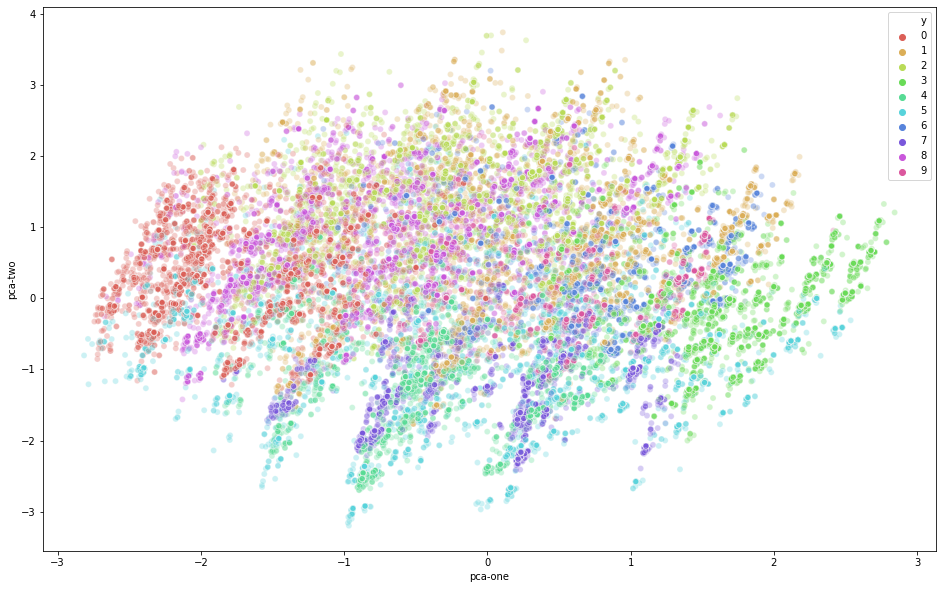

In [0]:
df_pca['pca-one'] = T[:,0]
df_pca['pca-two'] = T[:,1] 
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_pca,
    legend="full",
    alpha=0.3
)

## Modelo clasificador del cuerpo(Full body, Upper body, Only face)

Primero procedemos a la **ingesta de información** la cual se descomprime para su uso en el sistema de archivos que proporcional Google Colaboratory.

**Nota**: Cabe destacar que en la configuración en la instancia del notebook se mantiene activo el uso de Procesador gráfico (**GPU**) para agilizar los cálculos de tensores.


In [0]:
!wget "https://www.crcv.ucf.edu/data/Selfie/Selfie-dataset.tar.gz"
!tar -xf Selfie-dataset.tar.gz

--2020-02-08 14:53:02--  https://www.crcv.ucf.edu/data/Selfie/Selfie-dataset.tar.gz
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1104834653 (1.0G) [application/x-gzip]
Saving to: ‘Selfie-dataset.tar.gz’

Selfie-dataset.tar. 100%[===================>]   1.03G  66.2MB/s    in 16s     

2020-02-08 14:53:19 (64.1 MB/s) - ‘Selfie-dataset.tar.gz’ saved [1104834653/1104834653]



Se importan las librerías que fueron útiles tanto para el proceso ETL como para la construcción y entrenamiento del Modelo, entre ellas podemos encontrar:

- **Manejo del Sistema Operativo (Comandos Bash) y Sistema de archivos**: os, files

- **Dataframe**: pandas

- **Cálculos Numéricos**: numpy

- **Construcción del modelo**: tensorflow, keras

- **Visualización**: matplotlib

- **Procesamiento de imágenes**: cv2 (opencv)

In [0]:
%tensorflow_version 2.x
import os, os.path
import pandas as pd
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, models
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras import applications
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from google.colab import files

TensorFlow 2.x selected.


Se lee del archivo *datos_mejores1200.csv* el dataset que se usará como conjunto de datos de entrenamiento para el modelo y se desordena para hacer más aleatorio el proceso.

In [0]:
df = pd.read_csv("./drive/My Drive/AI introduction/datos_mejores1200.csv")
df = df.sample(frac=1)
df

Id Category
90       926432_798048153556511_451383079_a.jpg       1u
3530   1172096_1438135369760965_571176612_a.jpg       0o
2177  10175386_694084097321635_1087310943_a.jpg       2f
846   1530878_1516685491891744_1462601546_a.jpg       1u
2163   10254193_242507859206167_479116803_a.jpg       2f
...                                         ...      ...
2688   925461_1380286612231144_2059017133_a.jpg       0o
1531    928494_719373421447433_1535957162_a.jpg       2f
3089  10005685_1451609981742602_326598878_a.jpg       0o
2042    1515245_1409697895965678_28564204_a.jpg       2f
164    1515728_535519636555104_1281669709_a.jpg       1u

[3600 rows x 2 columns]

Se verifica que existan 1200 registros para la clase 0

In [0]:
df.loc[df.loc[:,"Category"] == "0o"]

Id Category
3530    1172096_1438135369760965_571176612_a.jpg       0o
2445    1171994_528277663960523_1123600196_a.jpg       0o
3119   10009264_813569325337574_1584797408_a.jpg       0o
3574      927630_609439372478372_297808827_a.jpg       0o
3559   1530866_1453765924859064_1237445441_a.jpg       0o
...                                          ...      ...
2696     926147_1400260026917080_271829127_a.jpg       0o
2454     1530814_614659665271044_494695980_a.jpg       0o
3528  10005660_1436587226588197_1438002184_a.jpg       0o
2688    925461_1380286612231144_2059017133_a.jpg       0o
3089   10005685_1451609981742602_326598878_a.jpg       0o

[1200 rows x 2 columns]

Se ajustan hiperparámetros esenciales para la construcción del modelo

In [0]:
img_width, img_height = 331, 331
nb_train_samples = 1024 #por clase
nb_validation_samples = 176 #por clase
epochs = 60
batch_size = 8

Se designa una particion de entrenamiento de solo los ejemplos que se desean tomar por clase según los hiperparámetros designados anteriormente

In [0]:
dftrain0 = df.loc[df.loc[:,"Category"] == "0o"][:nb_train_samples]
dftrain1 = df.loc[df.loc[:,"Category"] == "1u"][:nb_train_samples]
dftrain2 = df.loc[df.loc[:,"Category"] == "2f"][:nb_train_samples]
dftrain = pd.concat([dftrain0,dftrain1,dftrain2])
dftrain = dftrain.sample(frac=1)
dftrain

Id Category
789    10246034_616213468473525_828756903_a.jpg       1u
794    10251491_687533134644726_832511101_a.jpg       1u
997     1963107_563866313728529_950423381_a.jpg       1u
1566    926725_1485266278352075_971306244_a.jpg       2f
2339   1171001_1426502094267025_893968343_a.jpg       2f
...                                         ...      ...
2484   1530852_680413348686412_1279797101_a.jpg       0o
2860  10004164_232998166895064_1197991988_a.jpg       0o
1948   1172099_692246634150395_1364264167_a.jpg       2f
2887    1172039_298390793651951_524950801_a.jpg       0o
458   10005527_266845763476931_1585206006_a.jpg       1u

[3072 rows x 2 columns]

Se designa una particion de validación de solo los ejemplos que se desean tomar por clase según los hiperparámetros designados anteriormente

In [0]:
dfval0 = df.loc[df.loc[:,"Category"] == "0o"][-nb_validation_samples:]
dfval1 = df.loc[df.loc[:,"Category"] == "1u"][-nb_validation_samples:]
dfval2 = df.loc[df.loc[:,"Category"] == "2f"][-nb_validation_samples:]
dfval = pd.concat([dfval0,dfval1,dfval2])
dfval = dfval.sample(frac=1)
dfval

Id Category
983    10254166_615817911826814_864987596_a.jpg       1u
2395   10012547_540031632784067_398716169_a.jpg       2f
2688   925461_1380286612231144_2059017133_a.jpg       0o
751     927639_673591962706513_1789261149_a.jpg       1u
471     925465_810072359007469_1556396645_a.jpg       1u
...                                         ...      ...
2409    925466_461148147349305_1502844256_a.jpg       0o
139     926447_233167440205987_1958703270_a.jpg       1u
1562    925816_608558782561177_2045608545_a.jpg       2f
2791  10005607_1402024356739405_487911092_a.jpg       0o
663    10249135_305621166262445_187526202_a.jpg       1u

[528 rows x 2 columns]

Se usó la clase ImageDataGenerator como método de Data Augmentation para obtener mayor conjunto de entrenamiento y de validación a partir de las imágenes con las que se contaban

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range = 30,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_dataframe(
        dataframe=dftrain,
        directory='Selfie-dataset/images',
        x_col="Id",
        y_col="Category",
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

Found 3072 validated image filenames belonging to 3 classes.


In [0]:
validation_generator = test_datagen.flow_from_dataframe(
        dataframe=dfval,
        directory='Selfie-dataset/images',
        x_col="Id",
        y_col= "Category",
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

Found 528 validated image filenames belonging to 3 classes.


### Creación del Modelo

Se tomó como técnica de inicialización Transfer Learning, para tener base consolidada de procesamiento de imágenes en el modelo y ahorrar tiempo en un entrenamiento exhaustivo.

Se eligió el modelo NASNetLarge dado a que según la Documentación de Keras era considerada como la de mayor precisión en detección de objetos, a la misma se le indicó el número de clases y que sus pesos serían imagenet.

Este modelo consta de 88,949,818 parametros ya entrenados para decteccion de caracteristicas de objetos en imagenes y pesa 343 MB.



In [0]:
model = applications.nasnet.NASNetLarge(include_top=False, weights='imagenet', 
                                       input_tensor=None, input_shape=None, 
                                       pooling=None, classes=3)


Procedemos a visualizar la compleja arquitectura de Nasnet large

In [0]:
x = model.output

A dicha arquitectura se le agregan unas capas las cuales su función será abstraer la figura del cuerpo de las personas presentes en la selfie.

Dicha Arquitectura fue seleccionada despues de un proceso iterativo manual, del cual el mejor resultado fue producto de la misma

Se agregó una capa de pooling para adecuar la entrada a la primer capa densa, a continuacion se agregaron 6 capas densas con funcion de activacion *relu*, regularizadores l2 para evitar overfitting y con 4096, 4096, 2048, 1024, 512, 256 unidades respectivamente, además se agrego una capa de dropout entre cada capa densa tambien para evitar overfitting, por ultimo se agrego la capa de salida la cual es una capa densa con 3 unidades debido a que hay 3 clases y funcion de activacion *softmax* para que pueda decidir entre las 3 clases.

In [0]:
x=GlobalAveragePooling2D()(x)
x=Dense(4096,activation='relu', kernel_regularizer=regularizers.l2(0.001))(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.3)(x)
x=Dense(4096,activation='relu', kernel_regularizer=regularizers.l2(0.001))(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.3)(x)
x=Dense(2048,activation='relu', kernel_regularizer=regularizers.l2(0.001))(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.3)(x)
x=Dense(1024,activation='relu', kernel_regularizer=regularizers.l2(0.001))(x) #dense layer 2
x = Dropout(0.3)(x)
x=Dense(512,activation='relu', kernel_regularizer=regularizers.l2(0.001))(x) #dense layer 3
x = Dropout(0.3)(x)
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
output = Dense(3, activation = 'softmax')(x)

Se define el nuevo modelo el cual tiene la entrada del modelo NASNet Large y la salida qeu acabamos de crear.

In [0]:
final_model = Model(inputs=model.input,outputs=output)

A su vez se toman solo para entrenar dichas capas, esto es fundamental dado que no queremos entorpecer los pesos anteriormente entrenados en NasnetLarge


In [0]:
for layer in final_model.layers:
    layer.trainable=False

In [0]:
for layer in final_model.layers[-14:]:
    layer.trainable=True

Compilamos con el optimizador adam debido a su buen rendimiento y a estrategias para la convergencia rapido, a su vez usamos como métrica de perdida la entropía cruzada por categorías, no se usó entropía cruzada binaria porque tenemos mas de dos etiquetas

In [0]:
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Hacemos una última visualización del modelo despues de añadir las capas que abstraen la tarea de identificación del cuerpo de las personas en las selfies

In [0]:
final_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 331, 331, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_260 (Activation)     (None, 165, 165, 96) 0           stem_bn1[0][0]                   
____________________________________________________________________________________________

Revisamos las épocas con las cuales se entrenará nuestro modelo

In [0]:
epochs

60

Entrenamos el modelo con un EarlyStopping para evitar overfiting y un checkpoint del mejor modelo según la métrica val-loss la cual se busca minimizar

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

history = final_model.fit(x=train_generator,
                    steps_per_epoch=int(nb_train_samples*3 / batch_size),
                    validation_data=validation_generator,
                    validation_steps=int(nb_validation_samples*3 / batch_size),
                    epochs=epochs,
                    verbose=1,
                    callbacks=[EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=50,
                              verbose=1, mode='auto'), ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
                              ]
                    )

**El entrenamiento realizado se tomaron aproximadamente 60 épocas pero para reducir tiempos de entrenamiento cada vez que se ejecuta el notebook, entonces cargaremos best_model.h5**

Visualizamos la métricas val-loss y accuracy a través de las epocas entrenadas

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Se descarga el modelo completo y los pesos por aparte, sin embargo no se usó debido a que el checkpoint se crea automaticamente y ese es el que queremos descargar

In [0]:
# final_model.save("model_type.h5")
# files.download("model_type.h5")
# final_model.save_weights('weights_type.h5')
# files.download("weights_type.h5")

###Modelo

El modelo resultante se guardó y se puede encontrar en este enlace:\
https://drive.google.com/open?id=16Vemwp5vZKDf5XzDFDUhVIlU5Mr3MJ_8

Se carga el modelo generado por el checkpoint el cual es el que tiene menos *val_loss*

In [0]:
final_model = models.load_model("best_model.h5")

Mostramos según el generador para la validación un batch para mostrar que esta funcionando el modelo

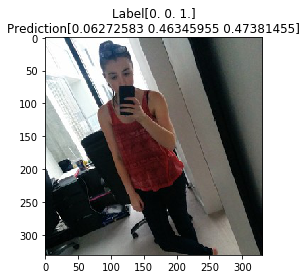

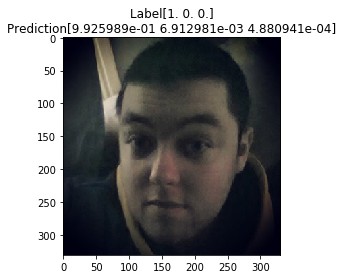

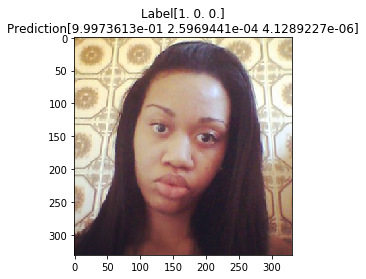

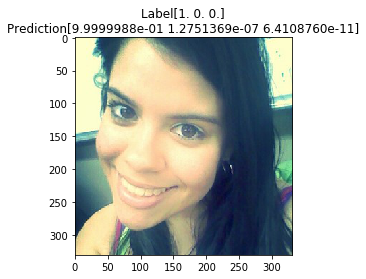

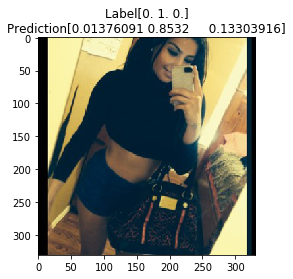

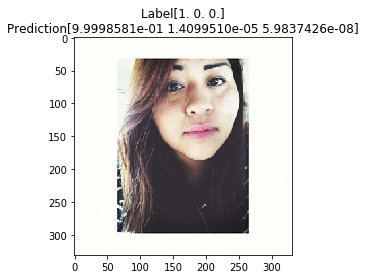

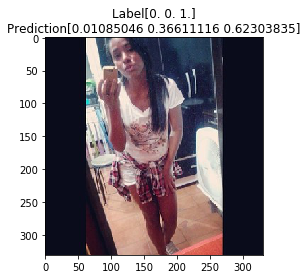

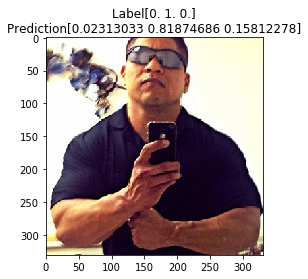

<Figure size 432x288 with 0 Axes>

In [0]:
for x_batch, y_batch in validation_generator:
  pre = final_model.predict(x_batch)
  for i in range(len(x_batch)):
    plt.title("Label" + str(y_batch[i]) + "\nPrediction" + str(pre[i]))
    plt.imshow(x_batch[i],vmin=0,vmax=1)
    plt.figure()
  break

Descargamos el modelo para no tener que estar entrenando cada vez

In [0]:
files.download("best_model.h5")

###Generando csv para Kaggle

Se carga el modelo y el csv en un dataframe para la prediccion de imagenes

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
new_model = models.load_model("./drive/My Drive/AI introduction/best_model.h5")
#new_model = final_model
df_kaggle = pd.read_csv("./drive/My Drive/AI introduction/test.csv")
df_kaggle.loc[:,"Id"]=df_kaggle.loc[:,"Id"]

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

Se cargan todas las imagenes

In [0]:
!unzip drive/My\ Drive/test.zip -d ./dataT/

Archive:  drive/My Drive/test.zip
replace ./dataT/DE2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./dataT/DE2.png         
  inflating: ./dataT/EG7.png         
  inflating: ./dataT/F97.png         
  inflating: ./dataT/FGI.png         
  inflating: ./dataT/H7B.png         
  inflating: ./dataT/HB7.png         
  inflating: ./dataT/HD1.png         
  inflating: ./dataT/HDH.png         
  inflating: ./dataT/IDG.png         
  inflating: ./dataT/0DB.png         
  inflating: ./dataT/0EB.png         
  inflating: ./dataT/0H7.png         
  inflating: ./dataT/0HJ.png         
  inflating: ./dataT/0KB.png         
  inflating: ./dataT/0KN.png         
  inflating: ./dataT/0LF.png         
  inflating: ./dataT/0LJ.png         
  inflating: ./dataT/0M3.png         
  inflating: ./dataT/0MB.png         
  inflating: ./dataT/0NJ.png         
  inflating: ./dataT/0NN.png         
  inflating: ./dataT/01N.png         
  inflating: ./dataT/1AB.png         
  inflating: ./dataT/1BB.pn

In [0]:
test_generator = test_datagen.flow_from_dataframe(
        dataframe=df_kaggle,
        directory='dataT',
        x_col="Id",
        y_col= "Id",
    #    y_col= "Category",
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode="raw",
        shuffle=False
        )

Found 1800 validated image filenames.


In [0]:
df_kaggle

Id Category
0     4G96.png.jpg         
1     2879.png.jpg         
2     1IAH.png.jpg         
3     455H.png.jpg         
4     246H.png.jpg         
...            ...      ...
1795  4FFH.png.jpg         
1796  15ID.png.jpg         
1797  367H.png.jpg         
1798  43IJ.png.jpg         
1799  5GCD.png.jpg         

[1800 rows x 2 columns]

Se agrega todas las predicciones al dataframe

In [0]:
df_kaggle ["Category"] = ""
X = []
y = []
batches = 0
for x_batch,y_batch in test_generator:
  pre = new_model.predict(x_batch)
  for i in range(len(x_batch)):
    X.append(y_batch[i])
    y.append((pre[i].argmax()))
  batches += 1
  if batches >= (1800/8):
    # we need to break the loop by hand because
    # the generator loops indefinitely
    break

data_tuples = list(zip(X,y))
df_tmp = pd.DataFrame(data_tuples, columns=["Id", "Category"])
df_tmp

Id  Category
0     4G96.png         2
1     2879.png         2
2     1IAH.png         2
3     455H.png         1
4     246H.png         1
...        ...       ...
1795  4FFH.png         1
1796  15ID.png         2
1797  367H.png         1
1798  43IJ.png         0
1799  5GCD.png         2

[1800 rows x 2 columns]

Se descarga el dataframe de las predicciones

In [0]:
df_tmp.to_csv("subkfinalfinal.csv",index=False)

##Modelo clasificador de filtros



Primero se descarga el dataset con el que se va a trabajar

In [0]:
!wget "https://www.crcv.ucf.edu/data/Selfie/Selfie-dataset.tar.gz"
!tar -xf Selfie-dataset.tar.gz


--2020-02-10 11:27:22--  https://www.crcv.ucf.edu/data/Selfie/Selfie-dataset.tar.gz
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1104834653 (1.0G) [application/x-gzip]
Saving to: ‘Selfie-dataset.tar.gz’

Selfie-dataset.tar. 100%[===================>]   1.03G  40.0MB/s    in 26s     

2020-02-10 11:27:49 (40.0 MB/s) - ‘Selfie-dataset.tar.gz’ saved [1104834653/1104834653]



Se importan todas la librerias que se van a usar

In [0]:
%tensorflow_version 2.x
import os, os.path
import pandas as pd
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras import applications, regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from google.colab import files
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

se carga el csv con los datos que se van a utilizar

In [0]:
import pandas as pd

df1 = pd.read_csv("dataFilters.csv")

df2 = pd.read_csv("dataFilters2.csv")

df_concat = pd.concat([df1, df2])

df_concat = df_concat[df_concat["Category"] == "Without_filter"].iloc[:, 1:3]
df_concat

Id        Category
1      10005482_719750208047427_590614958_a  Without_filter
2     10005479_1414079375519116_748246947_a  Without_filter
3     10011352_635631616507273_2125015921_a  Without_filter
6      10009253_623816771034069_801318225_a  Without_filter
10    10011201_224136381115194_1835808542_a  Without_filter
..                                      ...             ...
557   10011400_1489802944566308_535608378_a  Without_filter
561    10009275_239015059636286_849549857_a  Without_filter
562   10011326_611281372283279_1444670042_a  Without_filter
565  10011158_1406594582945639_1394527537_a  Without_filter
598   10005527_738508736189636_1898335367_a  Without_filter

[327 rows x 2 columns]

Se definen las funciones de los filtros que aplicaremos

In [0]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import numpy as np
from google.colab.patches import cv2_imshow
import os

os.makedirs("FilteredImages")

def convert_real_route(image_name):
  return "./Selfie-dataset/images/" + image_name + ".jpg"

list_filters = ["Blur", "Black_white", "Vintage", "Sepia", "Contrast", "Shapended"]

# Blur
def apply_blur(path):
  imagen = cv2.imread(path)
  # cv2_imshow(imagen)
  img = cv2.blur(imagen,(5,5))
  # print("Blur")
  # cv2_imshow(img)
  # plt.imshow(img)
  # plt.show()
  return img
    

# Vintage
def apply_vintage(path):
  imagen = cv2.imread(path)
  rows, cols = imagen.shape[:2]
  kernel = 255 * (cv2.getGaussianKernel(rows,200) * cv2.getGaussianKernel(cols,200).T )/ np.linalg.norm(cv2.getGaussianKernel(rows,200) * cv2.getGaussianKernel(cols,200).T )
  vintage_im = np.copy(imagen)# for each channel in the input image, we will apply the above filter
  for i in range(3):
      vintage_im[:,:,i] = vintage_im[:,:,i] * kernel
  return vintage_im


# Sepia
def apply_sepia(image_path):
    img = Image.open(image_path)
    width, height = img.size
    pixels = img.load()
    for py in range(height):
        for px in range(width):
            r, g, b = img.getpixel((px, py))
            tr = int(0.393 * r + 0.769 * g + 0.189 * b)
            tg = int(0.349 * r + 0.686 * g + 0.168 * b)
            tb = int(0.272 * r + 0.534 * g + 0.131 * b)
            if tr > 255:
                tr = 255

            if tg > 255:
                tg = 255

            if tb > 255:
                tb = 255

            pixels[px, py] = (tr,tg,tb)
    return np.array(img)[:, :, ::-1].copy()

# Black and White
def apply_bw(path):
  imagen = cv2.imread(path)
  grayImage = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

  return grayImage

# Contrast
def apply_contrast(path, level=100):
  img = Image.open(path)
  factor = (259 * (level + 255)) / (255 * (259 - level))
  def contrast(c):
      return 128 + factor * (c - 128)
  return np.array(img.point(contrast))[:, :, ::-1].copy()

# Sharp
def apply_sharp(path):
  imageObject = Image.open(path)
  sharpened = imageObject.filter(ImageFilter.SHARPEN).filter(ImageFilter.SHARPEN)
  return np.array(sharpened)[:, :, ::-1].copy()

In [0]:
lst_row = []
for index, row in df_concat.iterrows():
  
  imagen = cv2.imread(convert_real_route(row["Id"]))
  cv2.imwrite("./FilteredImages/" +"or_" +row["Id"]+ ".png", imagen)
  lst_row.append(["or_" +row["Id"]+ ".png", "sin_filtro"])

  # df2 = pd.DataFrame([], columns=["Id", "Filtro"])
  # df_filters.append(df2)

  blur = apply_blur(convert_real_route(row["Id"]))
  cv2.imwrite('./FilteredImages/' +"bl_" +row["Id"]+ ".png", blur)

  # df2 = pd.DataFrame([["bl_" +row["Id"]+ ".png", "blur"]], columns=["Id", "Filtro"])
  # df_filters.append(df2)
  lst_row.append(["bl_" +row["Id"]+ ".png", "blur"])

  sepia = apply_sepia(convert_real_route(row["Id"]))
  cv2.imwrite('./FilteredImages/' +"se_" +row["Id"]+ ".png", sepia)

  # df2 = pd.DataFrame([["se_" +row["Id"]+ ".png", "sepia"]], columns=["Id", "Filtro"])
  # df_filters.append(df2)
  lst_row.append(["se_" +row["Id"]+ ".png", "sepia"])

  bw = apply_bw(convert_real_route(row["Id"]))
  cv2.imwrite('./FilteredImages/' +"bw_" +row["Id"]+ ".png", bw)

  
  # df2 = pd.DataFrame([["bw_" +row["Id"]+ ".png", "black_white"]], columns=["Id", "Filtro"])
  # df_filters.append(df2)
  lst_row.append(["bw_" +row["Id"]+ ".png", "black_white"])

  contrast = apply_contrast(convert_real_route(row["Id"]))
  cv2.imwrite('./FilteredImages/' +"co_" +row["Id"]+ ".png", contrast)

  # df2 = pd.DataFrame([["co_" +row["Id"]+ ".png", "contrast"]], columns=["Id", "Filtro"])
  # df_filters.append(df2)
  lst_row.append(["co_" +row["Id"]+ ".png", "contrast"])

  sharp = apply_sharp(convert_real_route(row["Id"]))
  cv2.imwrite('./FilteredImages/' +"sh_" +row["Id"]+ ".png", sharp)

  # df2 = pd.DataFrame([["sh_" +row["Id"]+ ".png", "sharp"]], columns=["Id", "Filtro"])
  # df_filters.append(df2)
  lst_row.append(["sh_" +row["Id"]+ ".png", "sharp"])

  vintage = apply_vintage(convert_real_route(row["Id"]))
  cv2.imwrite('./FilteredImages/' +"vi_" +row["Id"]+ ".png", vintage)

  lst_row.append(["vi_" +row["Id"]+ ".png", "vintage"])

  # df2 = pd.DataFrame([["vi_" +row["Id"]+ ".png", "vintage"]], columns=["Id", "Filtro"])
  # df_filters.append(df2)

df_filters = pd.DataFrame(lst_row, columns=["Id", "Filtro"])

Se creó un dataframe con los filtros ya aplicados y una carpeta con las imagenes correspondientes

In [0]:
df_filters

Id       Filtro
0      or_10005482_719750208047427_590614958_a.png   sin_filtro
1      bl_10005482_719750208047427_590614958_a.png         blur
2      se_10005482_719750208047427_590614958_a.png        sepia
3      bw_10005482_719750208047427_590614958_a.png  black_white
4      co_10005482_719750208047427_590614958_a.png     contrast
...                                            ...          ...
2284  se_10005527_738508736189636_1898335367_a.png        sepia
2285  bw_10005527_738508736189636_1898335367_a.png  black_white
2286  co_10005527_738508736189636_1898335367_a.png     contrast
2287  sh_10005527_738508736189636_1898335367_a.png        sharp
2288  vi_10005527_738508736189636_1898335367_a.png      vintage

[2289 rows x 2 columns]

Se eligen los valores importantes con los que se va a trabajar

In [0]:
img_width, img_height = 299, 299
nb_train_samples = 271 #por clase
nb_validation_samples = 56 #por clase
epochs = 60
batch_size = 8

Se elijen los datos de entrenamiento y se ponen en un dataframe aparte

In [0]:
df = df_filters
dftrain0 = df.loc[df.loc[:,"Filtro"] == "sin_filtro"][:nb_train_samples]
dftrain1 = df.loc[df.loc[:,"Filtro"] == "blur"][:nb_train_samples]
dftrain2 = df.loc[df.loc[:,"Filtro"] == "sepia"][:nb_train_samples]
dftrain3 = df.loc[df.loc[:,"Filtro"] == "vintage"][:nb_train_samples]
dftrain4 = df.loc[df.loc[:,"Filtro"] == "sharp"][:nb_train_samples]
dftrain5 = df.loc[df.loc[:,"Filtro"] == "contrast"][:nb_train_samples]
dftrain6 = df.loc[df.loc[:,"Filtro"] == "black_white"][:nb_train_samples]
dftrain = pd.concat([dftrain0,dftrain1,dftrain2, dftrain3, dftrain4, dftrain5, dftrain6])
dftrain = dftrain.sample(frac=1)
dftrain

Id       Filtro
123   co_10004260_1575928609299233_1421424083_a.png     contrast
1300    sh_10005650_231123063762404_506162052_a.png        sharp
684    sh_10009226_522369504551045_1715984681_a.png        sharp
152   sh_10004111_1458666134369005_1719203379_a.png        sharp
1800   bl_10011474_228851860643398_1225427842_a.png         blur
...                                             ...          ...
383    sh_10011262_267932596713990_1363472855_a.png        sharp
1256    bw_10011364_303643139760415_750132257_a.png  black_white
1183  or_10011343_1423585227897087_1939750263_a.png   sin_filtro
1840    vi_10011295_608683745892901_942283695_a.png      vintage
258     vi_10005718_225418664332015_940778060_a.png      vintage

[1897 rows x 2 columns]

Lo mismo se hace con los datos de validación

In [0]:
df = df_filters
dfval0 = df.loc[df.loc[:,"Filtro"] == "sin_filtro"][-nb_validation_samples:]
dfval1 = df.loc[df.loc[:,"Filtro"] == "blur"][-nb_validation_samples:]
dfval2 = df.loc[df.loc[:,"Filtro"] == "sepia"][-nb_validation_samples:]
dfval3 = df.loc[df.loc[:,"Filtro"] == "vintage"][-nb_validation_samples:]
dfval4 = df.loc[df.loc[:,"Filtro"] == "sharp"][-nb_validation_samples:]
dfval5 = df.loc[df.loc[:,"Filtro"] == "contrast"][-nb_validation_samples:]
dfval6 = df.loc[df.loc[:,"Filtro"] == "black_white"][-nb_validation_samples:]
dfval = pd.concat([dfval0,dfval1,dfval2, dfval3, dfval4, dfval5, dfval6])
dfval = dfval.sample(frac=1)
dfval

Id       Filtro
2066  bl_10005474_452138618250856_1411206133_a.png         blur
2286  co_10005527_738508736189636_1898335367_a.png     contrast
2160  co_10011309_1456041637964942_139350045_a.png     contrast
1916  sh_10011373_755998371099736_1836803809_a.png        sharp
2231  sh_10004302_423261187817384_1187849038_a.png        sharp
...                                            ...          ...
2040   bw_10011343_500412760068537_226074085_a.png  black_white
1999   co_10009769_233909843477238_695747459_a.png     contrast
2158  se_10011309_1456041637964942_139350045_a.png        sepia
2192   bl_10005691_647012105348333_249613797_a.png         blur
2250  bw_10011245_277620862413678_1032390367_a.png  black_white

[392 rows x 2 columns]

Se crean los generadores de imagenes los cuales van a hacer el preprocesamiento a las imagenes antes de que sean procesadas por el modelo

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_dataframe(
        dataframe=dftrain,
        directory='FilteredImages',
        x_col="Id",
        y_col="Filtro",
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_dataframe(
		dataframe=dfval,
		directory='FilteredImages',
		x_col="Id",
		y_col= "Filtro",
		target_size=(img_width, img_height),
		batch_size=batch_size,
		class_mode='categorical')

Found 1897 validated image filenames belonging to 7 classes.
Found 392 validated image filenames belonging to 7 classes.


Se carga la arquitectura del modelo Xception sin incluir las capas superiores y tampoco se cargan pesos debido a la hipotesis planteada en el reporte

In [0]:
model = applications.xception.Xception(include_top=False, weights=None, 
                                       input_tensor=None, input_shape=None, 
                                       pooling=None)

Se agregan capas superiores al modelo

In [0]:
x = model.output

x=GlobalAveragePooling2D()(x)

x=Dense(1024,activation='relu')(x)

x=Dense(512,activation='relu')(x) 

x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(7, activation = 'softmax')(x)

In [0]:
final_model = Model(inputs=model.input,outputs=output)

Se ponen todas las capas como entrenables, esto debido a que no se cargaron los pesos del modelo pre-entrenado

In [0]:
for layer in final_model.layers:
    layer.trainable=True

Se compila el modelo, con optimizador adam y funcion de perdida *categorical_crossentropy*

In [0]:
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Se muestra un resumen del modelo para verificar que todo este en orden

In [0]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

Se ponea entrenar el modelo, utilizando Early stop y un *checkpoint* el cual va a guardar el modelo con la menor perdida en validación

In [0]:
history = final_model.fit(x=train_generator,
                    steps_per_epoch=int(nb_train_samples*3 / batch_size),
                    validation_data=validation_generator,
                    validation_steps=int(nb_validation_samples*3 / batch_size),
                    epochs=epochs,
                    callbacks=[EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='auto'), ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
                              ]
                 #   ,use_multiprocessing = True
                    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 101 steps, validate for 21 steps
Epoch 1/60
100/101 [============================>.] - ETA: 0s - loss: 1.8304 - accuracy: 0.3190
Epoch 00001: val_loss improved from inf to 1.94521, saving model to best_model.h5
101/101 [==============================] - 27s 272ms/step - loss: 1.8301 - accuracy: 0.3171 - val_loss: 1.9452 - val_accuracy: 0.1488
Epoch 2/60
100/101 [============================>.] - ETA: 0s - loss: 1.6704 - accuracy: 0.3253
Epoch 00002: val_loss improved from 1.94521 to 1.94451, saving model to best_model.h5
101/101 [==============================] - 27s 265ms/step - loss: 1.6704 - accuracy: 0.3246 - val_loss: 1.9445 - val_accuracy: 0.1488
Epoch 3/60
100/101 [============================>.] - ETA: 0s - loss: 1.6058 - accuracy: 0.3525
Epoch 00003: val_loss did not improve from 1.94451
101/101 [==============================] - 26s 257ms/step - loss: 1.6021 - accuracy: 0.3540 - val_loss: 2.0321 - val_accuracy: 0.131

Se grafican las curvas de entrenamiento y validación

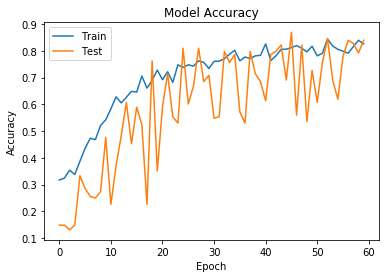

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Se crea una funcion para obetener la clase del brillo segun las probabilidades arrojadas por la predicción del modelo

In [0]:
def getClass (probs):
  num_label = probs.argmax()
  if num_label == 0:
    return "black_white"
  elif num_label == 1:
    return "blur"
  elif num_label == 2:
    return "contrast"
  elif num_label == 3:
  	return "sepia"
  elif num_label == 4:
	  return "sharp"
  elif num_label == 5:
  	return "sin_filtro"
  elif num_label == 6:
	  return "vintage"

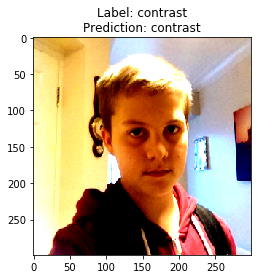

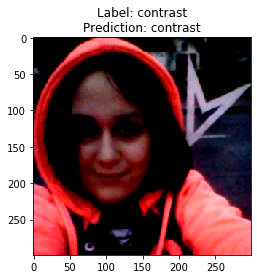

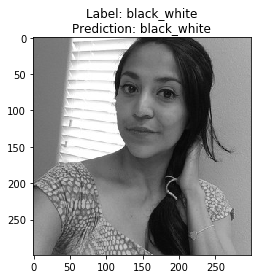

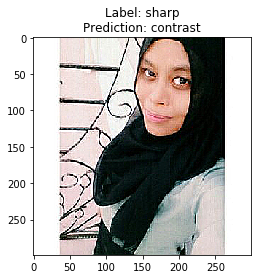

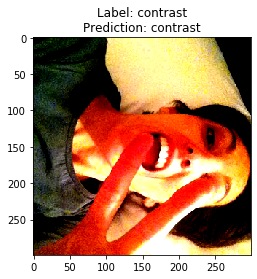

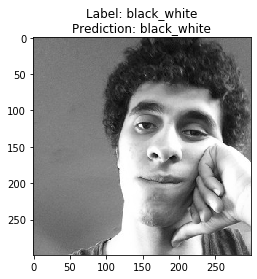

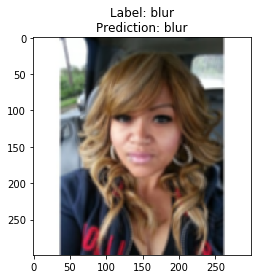

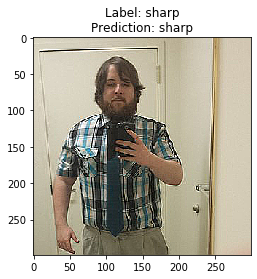

<Figure size 432x288 with 0 Axes>

In [0]:
for x_batch, y_batch in validation_generator:
  pre = final_model.predict(x_batch)
  for i in range(len(x_batch)):
    plt.title("Label: " + getClass(y_batch[i]) + "\nPrediction: " + getClass(pre[i]))
    plt.imshow(x_batch[i],vmin=0,vmax=1)
    plt.figure()
  break

## Modelo clasificador de brillo

Primero se descarga el dataset con el que se va a trabajar

In [0]:
!wget "https://www.crcv.ucf.edu/data/Selfie/Selfie-dataset.tar.gz"
!tar -xf Selfie-dataset.tar.gz

--2020-02-10 02:52:44--  https://www.crcv.ucf.edu/data/Selfie/Selfie-dataset.tar.gz
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1104834653 (1.0G) [application/x-gzip]
Saving to: ‘Selfie-dataset.tar.gz’

Selfie-dataset.tar. 100%[===================>]   1.03G  40.5MB/s    in 32s     

2020-02-10 02:53:17 (33.3 MB/s) - ‘Selfie-dataset.tar.gz’ saved [1104834653/1104834653]



Se importan todas la librerias que se van a usar

In [0]:
%tensorflow_version 2.x
import os, os.path
import pandas as pd
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras import applications, regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from google.colab import files
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

se carga el csv con los datos que s evan a utilizar

In [0]:
df = pd.read_csv("datos_brillo.csv")
df = df.sample(frac=1)
df

Id    Brillo
629    10175152_463104687155713_181051260_a.jpg      Bajo
682    10261302_490175671110685_170641638_a.jpg      Bajo
333    10011226_1385023831736226_75855063_a.jpg      Alto
738   10009244_765568446794247_1497427915_a.jpg      Bajo
647   10254161_1411382175793037_681259061_a.jpg      Bajo
..                                          ...       ...
723    10261284_613814208707146_578274425_a.jpg      Bajo
428   10011198_691387800909164_2013645848_a.jpg      Alto
222   10011194_548508421934370_1186327156_a.jpg  Adecuado
273   10005617_319314231527242_1994487307_a.jpg  Adecuado
186  10005576_1468224746742820_2017913112_a.jpg  Adecuado

[900 rows x 2 columns]

Se eligen los valores importantes con los que se va a trabajar

In [0]:
img_width, img_height = 299, 299
nb_train_samples = 240 #por clase
nb_validation_samples = 56 #por clase
epochs = 60
batch_size = 8

Se elijen los datos de entrenamiento y se ponen en un dataframe aparte

In [0]:
dftrain0 = df.loc[df.loc[:,"Brillo"] == "Alto"][:nb_train_samples]
dftrain1 = df.loc[df.loc[:,"Brillo"] == "Adecuado"][:nb_train_samples]
dftrain2 = df.loc[df.loc[:,"Brillo"] == "Bajo"][:nb_train_samples]
dftrain = pd.concat([dftrain0,dftrain1,dftrain2])
dftrain = dftrain.sample(frac=1)
dftrain

Id    Brillo
433    10011234_278040559037996_177173964_a.jpg      Alto
690    10011307_654102714663457_935639984_a.jpg      Bajo
758    10013083_587290594700550_389340476_a.jpg      Bajo
744   10005529_434164246717725_1527455151_a.jpg      Bajo
67   10005589_1473726506178056_1164294141_a.jpg  Adecuado
..                                          ...       ...
743    10011320_615309348550645_175616512_a.jpg      Bajo
311   10009335_618850318202396_1123074005_a.jpg      Alto
681     928510_463367430473297_1727764671_a.jpg      Bajo
836   10011244_659018914145947_2060782045_a.jpg      Bajo
413  10011173_1459385387629427_1621087371_a.jpg      Alto

[720 rows x 2 columns]

Lo mismo se hace con los datos de validación

In [0]:
dfval0 = df.loc[df.loc[:,"Brillo"] == "Alto"][-nb_validation_samples:]
dfval1 = df.loc[df.loc[:,"Brillo"] == "Adecuado"][-nb_validation_samples:]
dfval2 = df.loc[df.loc[:,"Brillo"] == "Bajo"][-nb_validation_samples:]
dfval = pd.concat([dfval0,dfval1,dfval2])
dfval = dfval.sample(frac=1)
dfval

Id    Brillo
718     928488_1486881531524251_800463099_a.jpg      Bajo
195   10011320_228646027324654_1470494200_a.jpg  Adecuado
706   10246141_481927561909177_1919528202_a.jpg      Bajo
295  10009177_1423136241271877_1306630499_a.jpg  Adecuado
692   1172149_1423164877937992_1337343925_a.jpg      Bajo
..                                          ...       ...
730    10009910_594756790620065_115971118_a.jpg      Bajo
412   10009799_834143299935614_1546265309_a.jpg      Alto
93    10011194_1455107088058394_126678336_a.jpg  Adecuado
807     10246139_209180029291476_26511612_a.jpg      Bajo
264    10011198_644048232317488_526234676_a.jpg  Adecuado

[168 rows x 2 columns]

Se crean los generadores de imagenes los cuales van a hacer el preprocesamiento a las imagenes antes de que sean procesadas por el modelo

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_dataframe(
        dataframe=dftrain,
        directory='Selfie-dataset/images',
        x_col="Id",
        y_col="Brillo",
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

Found 720 validated image filenames belonging to 3 classes.


In [0]:
validation_generator = test_datagen.flow_from_dataframe(
        dataframe=dfval,
        directory='Selfie-dataset/images',
        x_col="Id",
        y_col= "Brillo",
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

Found 168 validated image filenames belonging to 3 classes.


Se carga la arquitectura del modelo Xception sin incluir las capas superiores y tampoco se cargan pesos debido a la hipotesis planteada en el reporte

In [0]:
model = applications.xception.Xception(include_top=False, weights=None, 
                                       input_tensor=None, input_shape=None, 
                                       pooling=None)

Se agregan capas superiores al modelo

In [0]:
x = model.output

In [0]:
x=GlobalAveragePooling2D()(x)
# x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
# x = Dropout(0.3)(x)
x=Dense(1024,activation='relu')(x) 2
# x = Dropout(0.3)(x)
x=Dense(512,activation='relu')(x) 
# x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(3, activation = 'softmax')(x)



In [0]:
final_model = Model(inputs=model.input,outputs=output)

Se ponen todas las capas como entrenables, esto debido a que no se cargaron los pesos del modelo pre-entrenado

In [0]:
for layer in final_model.layers:
    layer.trainable=True

Se compila el modelo, con optimizador adam y funcion de perdida *categorical_crossentropy*

In [0]:
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Se compila el modelo, con optimizador adam y funcion de perdida *categorical_crossentropy*

In [0]:
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Se muestra un resumen del modelo para verificar que todo este en orden

In [0]:
final_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

Se ponea entrenar el modelo, utilizando Early stop y un *checkpoint* el cual va a guardar el modelo con la menor perdida en validación

In [0]:
history = final_model.fit(x=train_generator,
                    steps_per_epoch=int(nb_train_samples*3 / batch_size),
                    validation_data=validation_generator,
                    validation_steps=int(nb_validation_samples*3 / batch_size),
                    epochs=epochs,
                    callbacks=[EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='auto'), ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
                              ]
                 #   ,use_multiprocessing = True
                    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 90 steps, validate for 21 steps
Epoch 1/30
89/90 [============================>.] - ETA: 0s - loss: 0.3720 - accuracy: 0.8399
Epoch 00001: val_loss improved from inf to 0.48274, saving model to best_model.h5
90/90 [==============================] - 21s 232ms/step - loss: 0.3706 - accuracy: 0.8417 - val_loss: 0.4827 - val_accuracy: 0.7798
Epoch 2/30
89/90 [============================>.] - ETA: 0s - loss: 0.3736 - accuracy: 0.8497
Epoch 00002: val_loss did not improve from 0.48274
90/90 [==============================] - 20s 220ms/step - loss: 0.3857 - accuracy: 0.8444 - val_loss: 0.6424 - val_accuracy: 0.7857
Epoch 3/30
89/90 [============================>.] - ETA: 0s - loss: 0.4001 - accuracy: 0.8399
Epoch 00003: val_loss improved from 0.48274 to 0.39666, saving model to best_model.h5
90/90 [==============================] - 21s 231ms/step - loss: 0.4017 - accuracy: 0.8375 - val_loss: 0.3967 - val_accuracy: 0.8036
Epoch 4/30


Se grafican las curvas de entrenamiento y validación

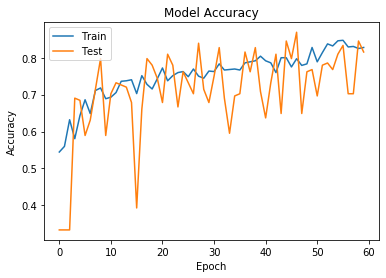

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Se crea una funcion para obetener la clase del brillo segun las probabilidades arrojadas por la predicción del modelo

In [0]:
def getClass (probs):
  num_label = probs.argmax()
  if num_label == 0:
    return "Adequate"
  elif num_label == 1:
    return "High"
  elif num_label == 2:
    return "Low"


Se hace un a pequeña muestra del funcionamiento del modelo sobre el conjunto de validación

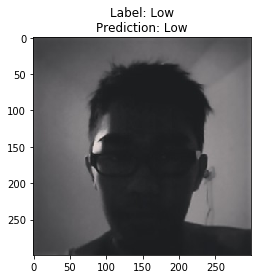

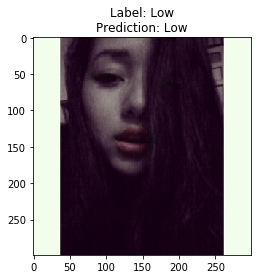

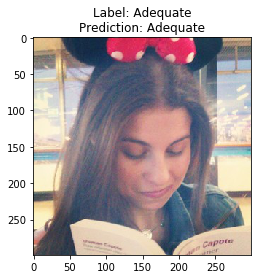

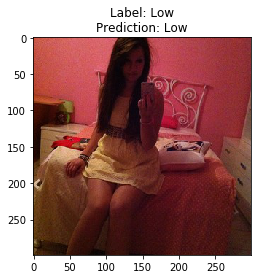

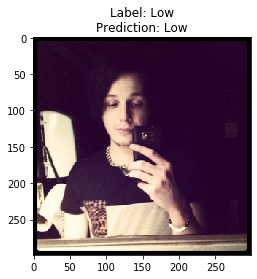

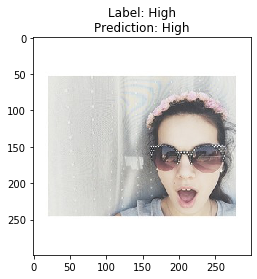

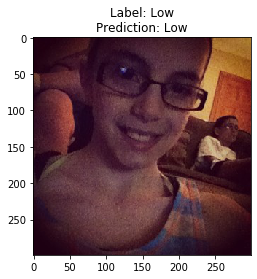

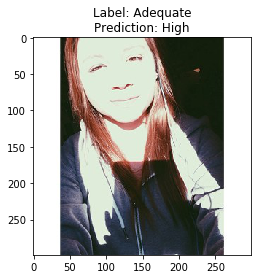

<Figure size 432x288 with 0 Axes>

In [0]:
for x_batch, y_batch in validation_generator:
  pre = final_model.predict(x_batch)
  for i in range(len(x_batch)):
    plt.title("Label: " + getClass(y_batch[i]) + "\nPrediction: " + getClass(pre[i]))
    plt.imshow(x_batch[i],vmin=0,vmax=1)
    plt.figure()
  break

Es importante crear una carpeta llamada *test* y dentro de esta poner otra carpeta con las fotos de prueba

In [0]:
brightness_model = load_model('best_model_brightness.h5')

In [0]:
images_dir = "./test"

test_generator = test_datagen.flow_from_directory(
        directory=images_dir,
        target_size=(299, 299),
        batch_size=1,
        shuffle=False,
        class_mode=None)

Found 3 images belonging to 2 classes.


Se prueba el modelo sobre imagenes totalmente aisladas del dataset de entrenamiento y validación

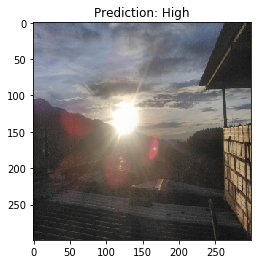

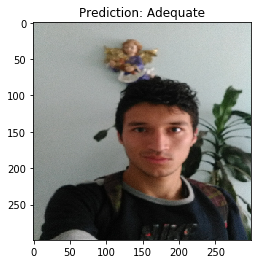

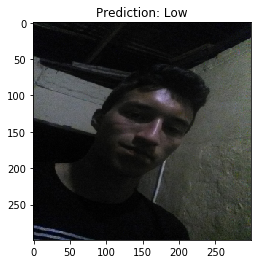

<Figure size 432x288 with 0 Axes>

In [0]:
i=0
for x in test_generator:
  plt.title("Prediction: " + getClass(brightness_model.predict(x)))
  plt.imshow(x[0],vmin=0,vmax=1)
  plt.figure()
  i+=1
  if i == len(test_generator):
    break

##Modelo clasificador de Calidad

Primero se descarga el dataset con el que se va a trabajar

In [0]:
!wget "https://www.crcv.ucf.edu/data/Selfie/Selfie-dataset.tar.gz"
!tar -xf Selfie-dataset.tar.gz

--2020-02-10 14:00:38--  https://www.crcv.ucf.edu/data/Selfie/Selfie-dataset.tar.gz
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1104834653 (1.0G) [application/x-gzip]
Saving to: ‘Selfie-dataset.tar.gz’

Selfie-dataset.tar. 100%[===================>]   1.03G  39.9MB/s    in 29s     

2020-02-10 14:01:08 (36.1 MB/s) - ‘Selfie-dataset.tar.gz’ saved [1104834653/1104834653]



Primero se descarga el dataset con el que se va a trabajar

In [0]:
%tensorflow_version 2.x
import os, os.path
import pandas as pd
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, models
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras import applications
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from google.colab import files

TensorFlow 2.x selected.


se carga el csv con los datos que s evan a utilizar

In [0]:
df = pd.read_csv("datos_calidaaaad.csv")
#df = df.drop(['Unnamed: 0'], axis=1)
#df.loc[:,"Id"]=df.loc[:,"Id"]+".jpg"
df = df.sample(frac=1)
df

Id Calidad
1237   10009869_387138088092977_1283164495_a.jpg     Bad
1047   10012451_1437137696527925_614244272_a.jpg     Bad
1940   10175085_627733117313237_1628415456_a.jpg     Bad
241    10009266_555899274524491_1511068222_a.jpg    Good
1165   10009424_438594189620314_1121193903_a.jpg     Bad
...                                          ...     ...
235   10013353_1424164071172641_1427856846_a.jpg    Good
195    10009838_713916471993415_1426510398_a.jpg    Good
524     10013325_658197094228391_981382142_a.jpg    Good
110    10009877_693598294017449_1917347455_a.jpg    Good
1550    10013323_732097496811143_148761752_a.jpg     Bad

[2000 rows x 2 columns]

In [0]:
df.loc[df.loc[:,"Calidad"] == "Good"]

Id Calidad
241   10009266_555899274524491_1511068222_a.jpg    Good
707   10009360_1440326342878396_885099253_a.jpg    Good
778    10013324_646543408749801_848494034_a.jpg    Good
796   10013353_224135021116068_1803562655_a.jpg    Good
267  10013345_1375223486093810_1442515752_a.jpg    Good
..                                          ...     ...
504  10009753_1423720181216696_1898809672_a.jpg    Good
235  10013353_1424164071172641_1427856846_a.jpg    Good
195   10009838_713916471993415_1426510398_a.jpg    Good
524    10013325_658197094228391_981382142_a.jpg    Good
110   10009877_693598294017449_1917347455_a.jpg    Good

[1000 rows x 2 columns]

Se eligen los valores importantes con los que se va a trabajar

In [0]:
img_width, img_height = 331, 331
nb_train_samples = 700
nb_validation_samples = 300
epochs = 60
batch_size = 8

Se elijen los datos de entrenamiento y se ponen en un dataframe aparte

In [0]:
dftrain0 = df.loc[df.loc[:,"Calidad"] == "Good"][:nb_train_samples]
dftrain1 = df.loc[df.loc[:,"Calidad"] == "Bad"][:nb_train_samples]
dftrain = pd.concat([dftrain0,dftrain1])
dftrain = dftrain.sample(frac=1)
dftrain

Id Calidad
983     10013325_617855594958601_978474203_a.jpg    Good
1330    10175145_245682965616247_125740105_a.jpg     Bad
263   10009898_1441064379470012_1069567349_a.jpg    Good
71      10009761_691789697529839_965325299_a.jpg    Good
1143    10012533_517487461694213_603054305_a.jpg     Bad
...                                          ...     ...
1117   10013328_380852538724514_1541435518_a.jpg     Bad
280   10009266_1441205859455719_2017880411_a.jpg    Good
624    10009736_1467249150173285_257540017_a.jpg    Good
747    10009331_248790285305190_1526360063_a.jpg    Good
387    10009256_1413486218911875_111759384_a.jpg    Good

[1400 rows x 2 columns]

Lo mismo se hace con los datos de validación

In [0]:
dfval0 = df.loc[df.loc[:,"Calidad"] == "Good"][-nb_validation_samples:]
dfval1 = df.loc[df.loc[:,"Calidad"] == "Bad"][-nb_validation_samples:]
dfval = pd.concat([dfval0,dfval1])
dfval = dfval.sample(frac=1)
dfval

Id Calidad
1521    10175146_228015424063104_672933915_a.jpg     Bad
619     10009873_614715241941047_720985164_a.jpg    Good
1314  10012440_1410393765891770_1017646528_a.jpg     Bad
1550    10013323_732097496811143_148761752_a.jpg     Bad
1557  10175086_1484063225139537_1741517234_a.jpg     Bad
...                                          ...     ...
743    10009881_134729816700817_1715160280_a.jpg    Good
519     10009850_601908786566150_751866788_a.jpg    Good
924     10009845_538809322898516_714317698_a.jpg    Good
1791    10012491_626156594141556_736595958_a.jpg     Bad
946     10009785_209552589253891_594557875_a.jpg    Good

[600 rows x 2 columns]

Se crean los generadores de imagenes los cuales van a hacer el preprocesamiento a las imagenes antes de que sean procesadas por el modelo

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_dataframe(
        dataframe=dftrain,
        directory='Selfie-dataset/images',
        x_col="Id",
        y_col="Calidad",
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 1400 validated image filenames belonging to 2 classes.


In [0]:
validation_generator = test_datagen.flow_from_dataframe(
        dataframe=dfval,
        directory='Selfie-dataset/images',
        x_col="Id",
        y_col= "Calidad",
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 600 validated image filenames belonging to 2 classes.


Se carga la arquitectura del modelo VGG19 sin  incluir las capas superiores y tampoco se cargan pesos debido a la hipotesis planteada en el reporte

In [0]:
model = applications.vgg19.VGG19(include_top=False,
                               weights='imagenet', 
                               input_tensor=None, 
                               input_shape=None, 
                               pooling=None, classes=2)

80142336/80134624 [==============================] - 2s 0us/step


Se agregan capas superiores al modelo

In [0]:
x = model.output

In [0]:
x=GlobalAveragePooling2D()(x)

x=Dense(4096,activation='relu', kernel_regularizer=regularizers.l2(0.001))(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.3)(x)
x=Dense(2048,activation='relu', kernel_regularizer=regularizers.l2(0.001))(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.3)(x)
x=Dense(2048,activation='relu', kernel_regularizer=regularizers.l2(0.001))(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.3)(x)
x=Dense(1024,activation='relu', kernel_regularizer=regularizers.l2(0.001))(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.3)(x)
x=Dense(1024,activation='relu', kernel_regularizer=regularizers.l2(0.001))(x) #dense layer 2
x = Dropout(0.3)(x)
x=Dense(512,activation='relu', kernel_regularizer=regularizers.l2(0.001))(x) #dense layer 3
x = Dropout(0.3)(x)
x=Dense(512,activation='relu', kernel_regularizer=regularizers.l2(0.001))(x) #dense layer 3
x = Dropout(0.3)(x)
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
output = Dense(2, activation = 'relu')(x)

In [0]:
final_model = Model(inputs=model.input,outputs=output)

Se ponen todas las capas como entrenables, esto debido a que no se cargaron los pesos del modelo pre-entrenado

In [0]:
for layer in final_model.layers:
    layer.trainable=True

In [0]:
for layer in final_model.layers[-18:]:
    layer.trainable=True

In [0]:
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Se muestra un resumen del modelo para verificar que todo este en orden

In [0]:
final_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
epochs

60

Se ponea entrenar el modelo, utilizando Early stop y un *checkpoint* el cual va a guardar el modelo con la menor perdida en validación

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

history = final_model.fit(x=train_generator,
                    steps_per_epoch=int(nb_train_samples*2 / batch_size),
                    validation_data=validation_generator,
                    validation_steps=int(nb_validation_samples*2 / batch_size),
                    epochs=epochs,
                    verbose=1,
                    callbacks=[EarlyStopping(monitor='val_loss',
                              min_delta=1,
                              patience=50,
                              verbose=1, mode='auto'), ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
                              ]
                    )

Using TensorFlow backend.


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 175 steps, validate for 75 steps
Epoch 1/60
174/175 [============================>.] - ETA: 0s - loss: 10.6527 - accuracy: 0.5043
Epoch 00001: val_loss improved from inf to 9.26462, saving model to best_model.h5
175/175 [==============================] - 44s 251ms/step - loss: 10.6449 - accuracy: 0.5043 - val_loss: 9.2646 - val_accuracy: 0.5000
Epoch 2/60
174/175 [============================>.] - ETA: 0s - loss: 8.8742 - accuracy: 0.4996
Epoch 00002: val_loss improved from 9.26462 to 8.58454, saving model to best_model.h5
175/175 [==============================] - 37s 210ms/step - loss: 8.8726 - accuracy: 0.4996 - val_loss: 8.5845 - val_accuracy: 0.5000
Epoch 3/60
174/175 [============================>.] - ETA: 0s - loss: 8.4145 - accuracy: 0.5011
Epoch 00003: val_loss improved from 8.58454 to 8.30889, saving model to best_model.h5
175/175 [==============================] - 37s 213ms/step - loss: 8.4139 - accuracy: 0.5011 - v

Se grafican las curvas de entrenamiento y validación

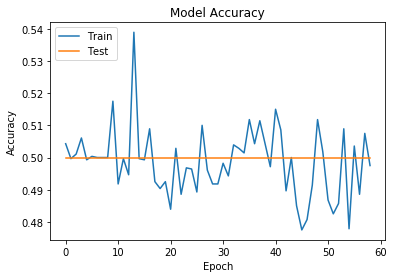

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Otros experimentos

Se trató en un comienzo de realizar un acercamiento con multietiquetado para el problema de brillo, calidad y filtros; sin embargo como el proceso de etiquetado resulto muy subjetivo y no todos etiquetamos las mismas imágenes; fue descartado, sin embargo luego intentamos abordar este enfoque con dos etiquetas propias del dataset y este fue nuestro resultado:

##Multasking classification (Female, White)

In [0]:
!wget "https://www.crcv.ucf.edu/data/Selfie/Selfie-dataset.tar.gz"
!tar -xf Selfie-dataset.tar.gz

--2020-02-10 16:02:33--  https://www.crcv.ucf.edu/data/Selfie/Selfie-dataset.tar.gz
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1104834653 (1.0G) [application/x-gzip]
Saving to: ‘Selfie-dataset.tar.gz’

Selfie-dataset.tar.  40%[=======>            ] 423.94M  73.2MB/s    eta 11s    

In [0]:
%tensorflow_version 2.x
import os, os.path
import pandas as pd
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras import applications
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [0]:
columns_name = ["Id", "popularity_score", "partial_faces", "is_female", "baby", "child", "teenager",
                "youth", "middle_age", "senior", "white", "black", "asian",
                "oval_face", "round_face", "heart_face", "smiling", "mouth_open",
                "frowning", "wearing_glasses", "wearing_sunglasses", "wearing_lipstick",
                "tongue_out", "duck_face", "black_hair", "blond_hair", "brown_hair",
                "red_hair", "curly_hair", "straight_hair", "braid_hair", "showing_cellphone",
                "using_earphone", "using_mirror", "braces", "wearing_hat", "harsh_lighting",
                "dim_lighting"]

df = pd.read_csv("data/selfie_dataset.txt", sep=' ', names=columns_name)

In [0]:
dftest = df[["Id","is_female","white","using_mirror","showing_cellphone"]]

In [0]:
dftest.loc[dftest.loc[:,"is_female"] == 0]

In [0]:
dftest = dftest.loc[dftest.loc[:,"is_female"] != 0]
dftest = dftest.replace({-1: 0})
dftest

In [0]:
dftest.loc[:,"Id"] += ".jpg" 

In [0]:
train_df = dftest.copy().loc[dftest.loc[:,"is_female"] == 0][:10000]
train_df = pd.concat([train_df,dftest.copy().loc[dftest.loc[:,"is_female"] == 1][:10000]])
train_df

In [0]:
valid_df = dftest.copy().loc[dftest.loc[:,"is_female"] == 0][-1500:]
valid_df = pd.concat([valid_df,dftest.copy().loc[dftest.loc[:,"is_female"] == 1][-1500:]])
valid_df

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory='data/images',
        x_col="Id",
        y_col=["is_female","white"],
        target_size=(224, 224),
        batch_size=8,
        class_mode='multi_output')

In [0]:
validation_generator = test_datagen.flow_from_dataframe(
        dataframe=valid_df,
        directory='data/images',
        x_col="Id",
        y_col= ["is_female","white"],
        target_size=(224, 224),
        batch_size=8,
        class_mode='multi_output')

In [0]:
model = applications.mobilenet_v2.MobileNetV2(include_top=False, weights='imagenet', 
                                       input_tensor=None, input_shape=None, 
                                       pooling=None, classes=3)

In [0]:
x = model.output

In [0]:
#x = Flatten(input_shape=model.output.shape[1:])(x)
x=GlobalAveragePooling2D()(x)
x1 = Dense(256, activation='relu')(x)
x2 = Dense(256, activation='relu')(x)
#x3 = Dense(256, activation='relu')(x)
x1 = Dropout(0.5)(x1)
x2 = Dropout(0.5)(x2)
#x3 = Dropout(0.5)(x3)
#preds = Dense(3, activation='softmax')(x)
#preds = Dense(3, activation='sigmoid')(x)

output1 = Dense(1, activation = 'sigmoid')(x1)
output2 = Dense(1, activation = 'sigmoid')(x2)
#output3 = Dense(1, activation = 'sigmoid')(x3)



In [0]:
final_model = Model(inputs=model.input,outputs=[output1,output2])

In [0]:
for layer in final_model.layers:
    layer.trainable=False

In [0]:
for layer in final_model.layers[-7:]:
    layer.trainable=True

In [0]:
#final_model.compile(optimizer='adam',
 #             loss='categorical_crossentropy', metrics=['accuracy'])
 
final_model.compile(optimizer='adam',loss=["binary_crossentropy", "binary_crossentropy"],metrics=["accuracy"])

In [0]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [0]:
nb_train_samples = 20000
nb_validation_samples = 3000
epochs = 50
batch_size = 8

In [0]:
history = final_model.fit(x=train_generator,
                    steps_per_epoch=int(nb_train_samples / batch_size),
                    validation_data=validation_generator,
                    validation_steps=int(nb_validation_samples / batch_size),
                    epochs=epochs
                 #   ,use_multiprocessing = True
                    )

Train for 2500 steps, validate for 375 steps
Epoch 1/50
 650/2500 [======>.......................] - ETA: 3:37 - loss: 1.2357 - dense_2_loss: 0.5276 - dense_3_loss: 0.7081 - dense_2_accuracy: 0.7448 - dense_3_accuracy: 0.5594

In [0]:
plt.plot(history.history['dense_2_accuracy'])
plt.plot(history.history['val_dense_2_accuracy'])
plt.plot(history.history['dense_3_accuracy'])
plt.plot(history.history['val_dense_3_accuracy'])
plt.title('Model Acuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_Female', 'Test_Female','Train_White', 'Test_White'], loc='upper left')
plt.show()

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
from google.colab import files

In [0]:
final_model.save("model_female_white.h5")
files.download("model_female_white.h5")

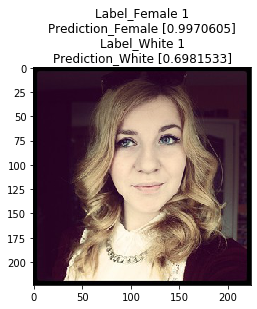

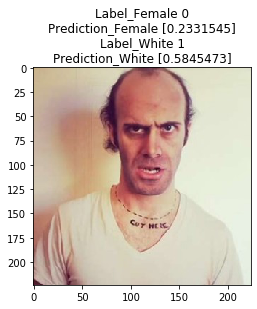

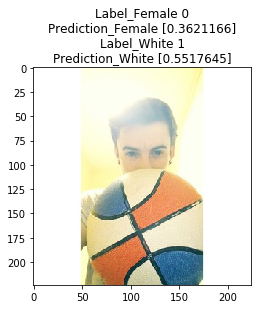

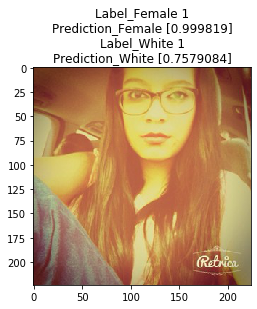

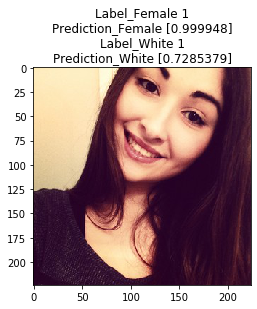

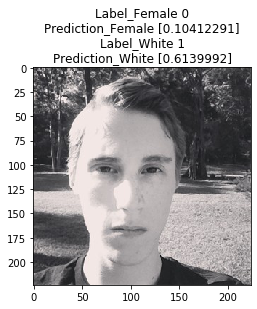

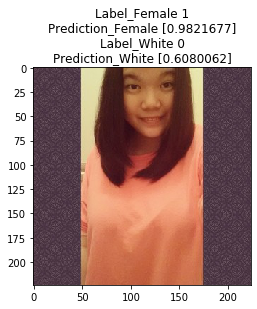

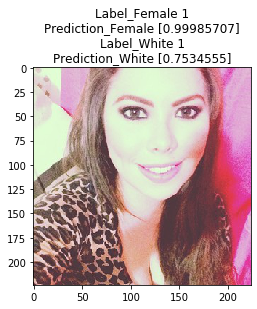

<Figure size 432x288 with 0 Axes>

In [0]:
for x_batch, y_batch in validation_generator:
  pre = final_model.predict(x_batch)
  for i in range(len(x_batch)):
    plt.title("Label_Female " + str(y_batch[0][i]) + "\nPrediction_Female " + str(pre[0][i])+ "\nLabel_White " + str(y_batch[1][i]) + "\nPrediction_White " + str(pre[1][i]))
    plt.imshow(x_batch[i],vmin=0,vmax=1)
    plt.figure()
  break